In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Főfüggvény

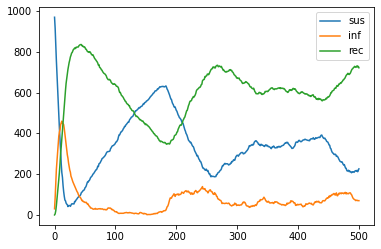

In [11]:
L = 60
N = 1000
inf = 30 #starting number of infected men
beta = 0.8
gamma = 0.1
alpha = 0.01

lattice = np.zeros([L,L]) #grid of population

i = 0
while i < N:
    place = np.random.randint(0,L, size=2)
    if lattice[place[0], place[1]] == 1 or lattice[place[0], place[1]] == 2:
        continue
    elif i < inf:
        lattice[place[0], place[1]] = 2   #infected
        i += 1

    if lattice[place[0], place[1]] == 1 or lattice[place[0], place[1]] == 2:
        continue
    else:
        lattice[place[0], place[1]] = 1   #susceptible
        i +=1


sus, inf, rec = iterate(lattice, beta, gamma, alpha)

plt.plot(range(len(sus)), sus, range(len(sus)), inf, range(len(sus)), rec)
plt.legend(['sus', 'inf', 'rec'])
plt.show()

### Iterátor

In [7]:
def iterate(lattice, beta, gamma, alpha):
    sus = []
    inf = []
    rec = []
    sus.append(len(np.where(lattice == 1)[0]))
    inf.append(len(np.where(lattice == 2)[0]))
    rec.append(len(np.where(lattice == 3)[0]))
    # while inf[-1] > 0:
    for i in range(500):
        inf.append(infecting(lattice, beta))
        rec.append(recovering(lattice, gamma))
        back_to_basic(lattice, alpha)
        sus.append(stepping(lattice))
    return sus, inf, rec

### Mgfertőzések eszkalálása

In [8]:
# itt csak 4 szomszedot kell nezni, ha negyzetracs graf van
# 

def infecting(lattice, beta):
    N = np.shape(lattice)[0]
    inf_x,inf_y = np.where(lattice == 2) #kivesszuk az aktualis racsbol az inf helyeket, es csak ezeket nezzuk-> miutan egy ciklusban fertozotte valt, azt nem nezi, mert a where el kivette az elejen az elozo korben fertozotteket es abban nem lesz benne
    # print('Infected', inf_x, inf_y)
    for n in range(len(inf_x)):
        # print('Current', inf_x[n], inf_y[n])
        for j in range(-1,2):   #sor
            for k in range(-1,2):   #oszlop

                #negy sarok
                if inf_x[n] == 0 and inf_y[n] == 0 and j == -1 and k == -1: chance(N-1, N-1, beta)
                elif inf_x[n] == 0 and inf_y[n] == N-1 and j == -1 and k == 1: chance(N-1, 0, beta)
                elif inf_x[n] == N-1 and inf_y[n] == N-1 and j == 1 and k == 1: chance(0, 0, beta)
                elif inf_x[n] == N-1 and inf_y[n] == 0 and j == 1 and k == -1: chance(0, N-1, beta)
                
                #negy szele
                elif inf_x[n] == 0 and j == -1 and inf_y[n]+k != -1 and inf_y[n]+k != N: chance(N-1, inf_y[n]+k, beta)
                elif inf_x[n] == N-1 and j == 1 and inf_y[n]+k != -1 and inf_y[n]+k != N: chance(0, inf_y[n]+k, beta)
                elif inf_y[n] == 0 and k == -1 and inf_x[n]+j != -1 and inf_x[n]+j != N: chance(inf_x[n]+j, N-1, beta)
                elif inf_y[n] == N-1 and k == 1 and inf_x[n]+j != -1 and inf_x[n]+j != N: chance(inf_x[n]+j, 0, beta)
                
                #belso pontok
                else:
                    chance(inf_x[n] + j, inf_y[n] + k, beta)
    inf = np.where(lattice == 2) 
    return len(inf[0])

                
#milyen valseggel lesz a szomszed fertozott
def chance(x, y, beta):
    p = np.random.random()
    # print(x, y)
    if p < beta and lattice[x, y] == 1:
        lattice[x, y] = 2


### Meggyógyulások alakulása

In [9]:
def recovering(lattice, gamma):
    inf_x,inf_y = np.where(lattice == 2)
    for n in range(len(inf_x)):
        p = np.random.random()
        if p < gamma:
            lattice[inf_x[n], inf_y[n]] = 3
    rec = np.where(lattice == 3)
    return len(rec[0])

def back_to_basic(lattice, alpha):
    inf_x,inf_y = np.where(lattice == 3)
    for n in range(len(inf_x)):
        p = np.random.random()
        if p < alpha:
            lattice[inf_x[n], inf_y[n]] = 1
    return

### Időfejlődés lépésekkel

In [10]:
def stepping(lattice):
    N = np.shape(lattice)[0]
    x,y = np.where(lattice > 0)
    order = np.arange(len(x))
    np.random.shuffle(order)
    
    for n in range(len(x)):
        direction = np.random.randint(1,5)  # 1 up, 2 right, 3 down, 4 left
        if direction == 1:          # a switch would be nice here, too bad it is only in 3.10 or higher version called match
            dest_x = x[order[n]]+1
            dest_y = y[order[n]]
        elif direction == 2:
            dest_x = x[order[n]]
            dest_y = y[order[n]]+1
        elif direction == 3:
            dest_x = x[order[n]]-1
            dest_y = y[order[n]]
        elif direction == 4:
            dest_x = x[order[n]]
            dest_y = y[order[n]]-1

        if dest_x == -1:
            dest_x = N-1
        if dest_x == N:
            dest_x = 0
        if  dest_y == -1:
            dest_y = N-1
        if dest_y == N:
            dest_y = 0

        if occupied(dest_x, dest_y):
            continue
        else:
            lattice[dest_x, dest_y] = lattice[x[order[n]], y[order[n]]]
            lattice[x[order[n]], y[order[n]]] = 0
    return len(np.where(lattice == 1)[0])

def occupied(x, y):
    if lattice[x, y] > 0:
        return True